# **Laporan Proyek Machine Learning - Muhammad Adi Nugroho**

- **Nama**: Muhammad Adi Nugroho
- **Email**: m.adinuugroho@gmail.com
- **ID Dicoding**: m_adinuugroho

## **Domain Proyek**

Churn, atau tingkat perpindahan pelanggan adalah hal yang sangat penting bagi perusahaan telekomunikasi karena dapat mempengaruhi pendapatan dan reputasi perusahaan tersebut.

## **Business Understanding**

### **Problem Statements**

1. Tingkat churn pelanggan yang tinggi dapat menjadi indikasi dari kekurangan dalam layanan atau promosi yang tidak memadai. Dengan demikian, perusahaan telekomunikasi perlu memahami faktor-faktor apa yang mendorong pelanggan untuk berhenti berlangganan.

2. Mengidentifikasi pola dan tren yang terkait dengan churn pelanggan dapat membantu perusahaan untuk mengantisipasi dan mencegah kehilangan pelanggan di masa depan. Namun, keberhasilan dalam hal ini bergantung pada kemampuan untuk mengelola dan menganalisis data pelanggan dengan efektif.

### **Goals**

1. Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap churn pelanggan. Dengan memahami faktor-faktor ini, perusahaan dapat mengambil tindakan yang tepat untuk meningkatkan retensi pelanggan dan mengurangi tingkat churn.

2. Mengembangkan model prediktif yang dapat memprediksi churn pelanggan dengan akurasi yang tinggi. Dengan demikian, perusahaan dapat mengambil tindakan preventif dengan cepat untuk mempertahankan pelanggan yang mungkin berisiko berhenti berlangganan.

## **Data Description**

- Customer ID
- Gender : Whether the customer is a male or a female
- Senior Citizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- Tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

## **Data Understanding**

### **Load Data**
The Data available in kaggle, with this link : [Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)

In [1091]:
import pandas as pd
import zipfile 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [1092]:
# Extract zip file
with zipfile.ZipFile('archive (24).zip', 'r') as zip_file:
    zip_file.extractall()

In [1093]:
pd.set_option('display.max_columns', None)
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', delimiter=',')
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1094]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1095]:
dataset.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## **Exploratory Data Analysis**

In [1096]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Based on the column description, `SeniorCitizen` column should be Yes/No rather than 0/1. So, i will change it

In [1097]:
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].replace({0:'No', 1:'Yes'})

Since the `TotalCharges` data type is object. I need to change it to numerical

In [1098]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

#### **a. Check Null Values and Duplicate**  

In [1099]:
print(f'Check Null Values\n\n{dataset.isna().sum()}')

Check Null Values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [1100]:
# Check duplicate on customerID, and overall features
print(f'Duplicate values in customerID\t: {dataset["customerID"].duplicated().sum()}\n')
print(f'Duplicate in all features\t:\n{dataset[dataset.duplicated()].sum()}')

Duplicate values in customerID	: 0

Duplicate in all features	:
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      0.0
TotalCharges        0.0
Churn                 0
dtype: object


> Since, in the Customer ID there is no duplicate - meaning all of them are different person. So, we can delete the Customer ID column.

In [1101]:
dataset = dataset.drop(columns='customerID')

#### **b. Quick Look at the Categorical and Numerical Data**

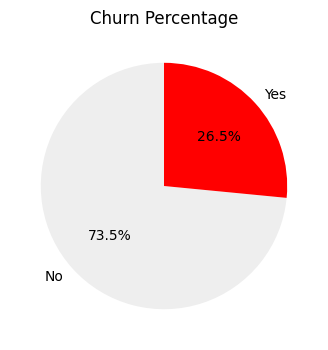

In [1102]:
plt.figure(figsize=(5, 4))
pie_churn = dataset['Churn'].value_counts().reset_index(name='count')
plt.pie(pie_churn['count'], 
        labels=pie_churn['Churn'], 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#eeeeee', 'red'])
plt.title('Churn Percentage')
plt.show()

### **Univariate Analysis**

In [1103]:
numerical_features = list(dataset.describe().T.index)
categorical_features = list(col for col in dataset.columns if col not in numerical_features)

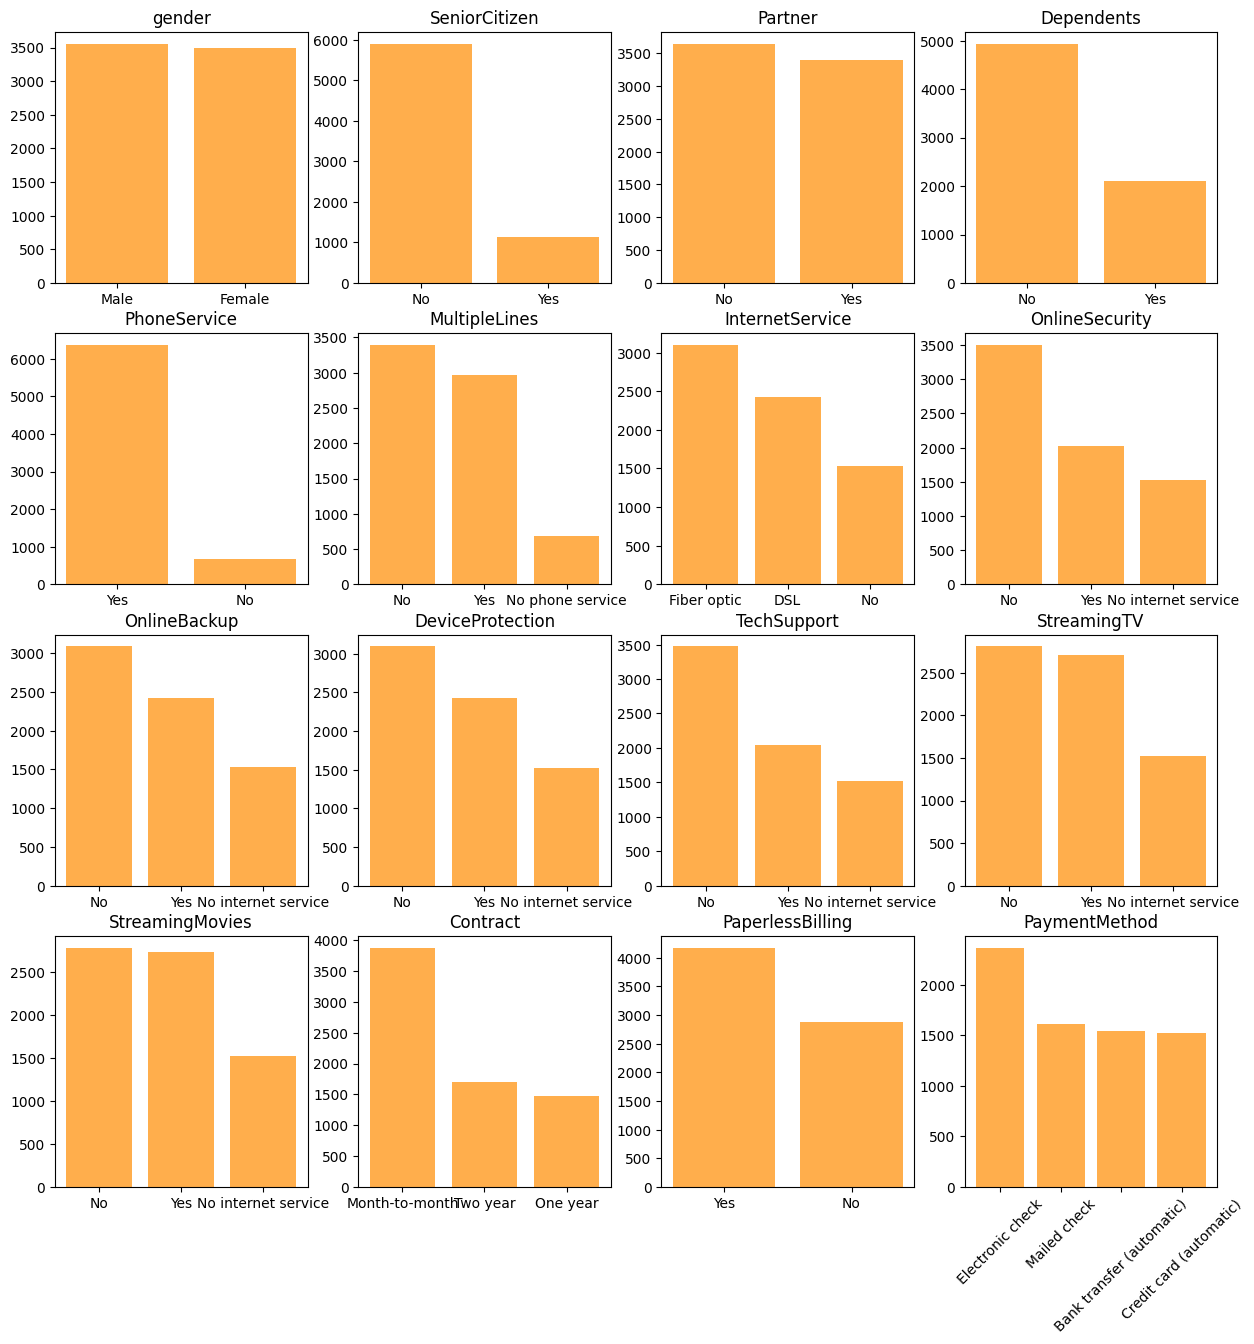

In [1104]:
num_rows, num_cols = 4, 4  # matching the categorical features

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axs = axs.flatten()

cat_features_to_visualize = list(col for col in categorical_features if col != 'Churn')

for i, col in enumerate(cat_features_to_visualize):

    graph = dataset[col].value_counts().reset_index(name='value')

    axs[i].bar(graph[col], graph['value'], color='darkorange', alpha=0.7)
    axs[i].set_title(col)

    if col == 'PaymentMethod':
        axs[i].tick_params(axis='x', rotation=45)
    
    elif col == 'Churn':
        pass

**Take a Deep Look in InternetServices that Company Had**
InternetService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Streaming Movies.

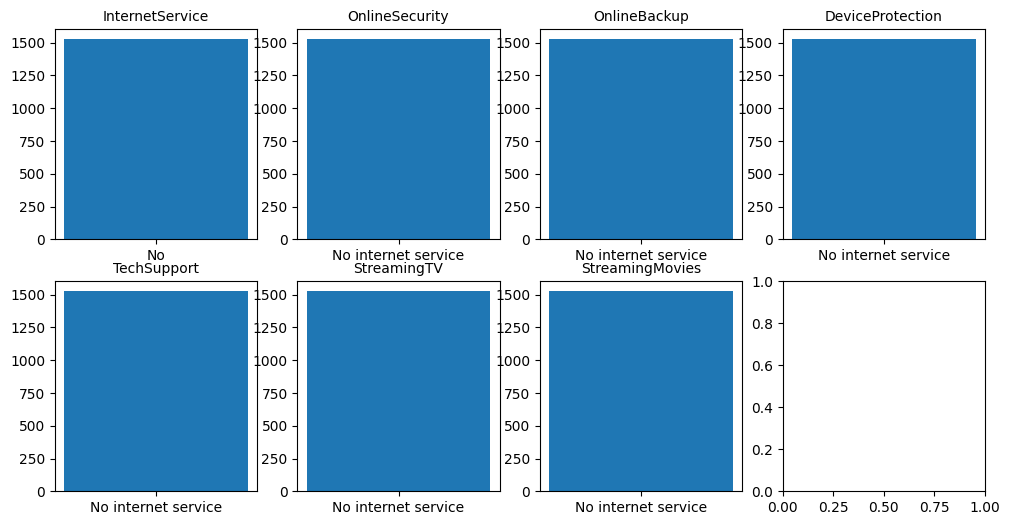

In [1105]:
service_cols = ['InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

int_services1 = dataset.loc[dataset['InternetService'] == 'No', service_cols]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

axs = axs.flatten()

for i, col in enumerate(service_cols):

    # Specify the data
    graph = int_services1[col].value_counts().reset_index(name='count')

    axs[i].bar(graph[col], graph['count'])

    axs[i].set_title(col, fontsize=10)

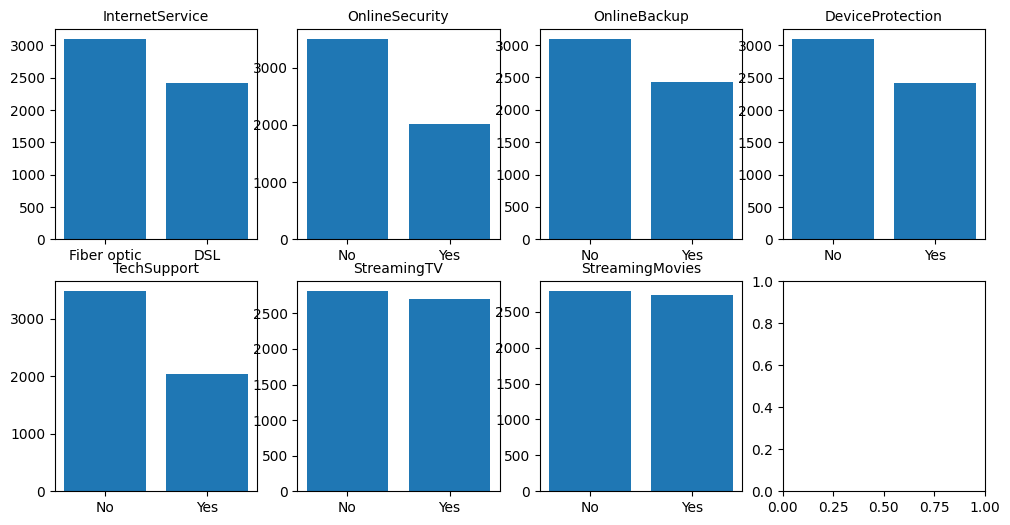

In [1106]:
int_services2 = dataset.loc[dataset['InternetService'].isin(['DSL', 'Fiber optic']), service_cols]

fig, axs = plt.subplots(2, 4, figsize = (12, 6))

axs = axs.flatten()

for i, col in enumerate(service_cols):
    # Specify the data
    graph = int_services2[col].value_counts().reset_index(name ='count')

    axs[i].bar(graph[col], graph['count'])
    axs[i].set_title(col, fontsize=10)

plt.show()

**Take a Look at the Phone Services**

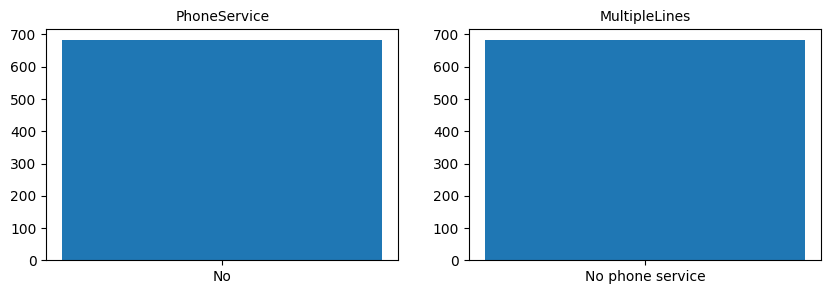

In [1107]:
phone_services = dataset.loc[dataset['PhoneService'] == 'No', ['PhoneService','MultipleLines']]

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs = axs.flatten()

for i, col in enumerate(phone_services.columns):
    # Specify the data
    graph = phone_services[col].value_counts().reset_index(name='count')

    axs[i].bar(graph[col], graph['count'])
    axs[i].set_title(col, fontsize = 10)

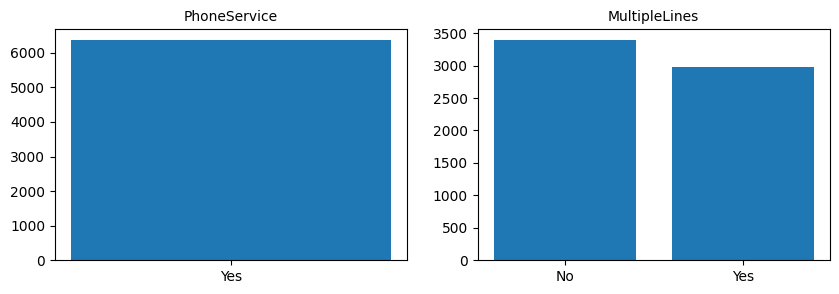

In [1108]:
phone_services = dataset.loc[dataset['PhoneService'] == 'Yes', ['PhoneService','MultipleLines']]

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs = axs.flatten()

for i, col in enumerate(phone_services.columns):
    # Specify the data
    graph = phone_services[col].value_counts().reset_index(name='count')

    axs[i].bar(graph[col], graph['count'])
    axs[i].set_title(col, fontsize = 10)

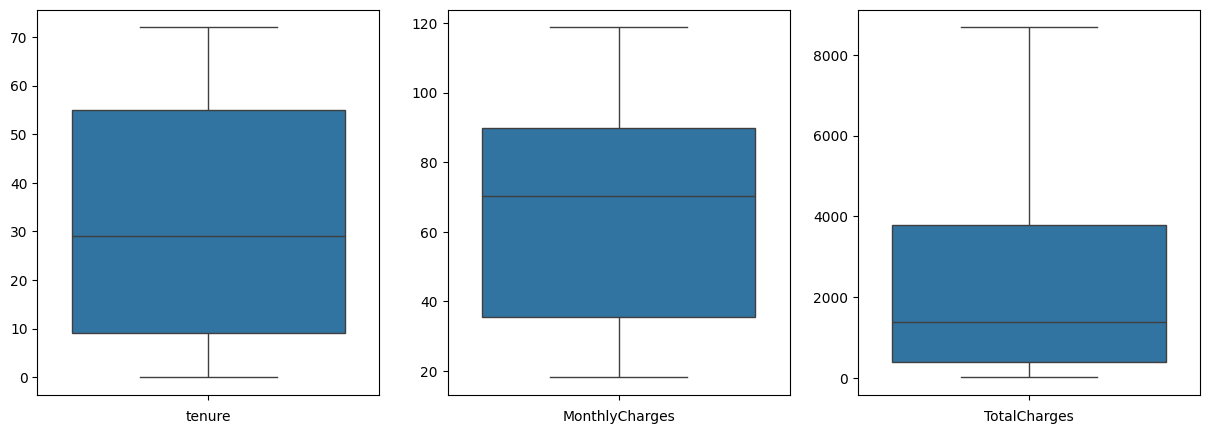

In [1109]:
plt.figure(figsize=(15, 5))
plotnumber=1
for feature in numerical_features:
    ax = plt.subplot(1, 3, plotnumber)
    sns.boxplot(y=feature, data=dataset)
    plt.ylabel('')
    plt.xlabel(feature)
    plotnumber+=1

plt.show()

From above output there are no outlier for numerical data

there is some mismatch in the **TotalCharges** column, some value in **TotalCharges** align with the how long the **tenure** column, but some value not align. so, i'll try to recreate. i will multiply tenure and monthlycharges to make new TotalCharges

In [1110]:
dataset['TotalCharges'] = dataset['tenure']*dataset['MonthlyCharges']

In [1111]:
dataset.loc[dataset['tenure'] == 0].Churn.value_counts()

Churn
No    11
Name: count, dtype: int64

There are 11 new customers

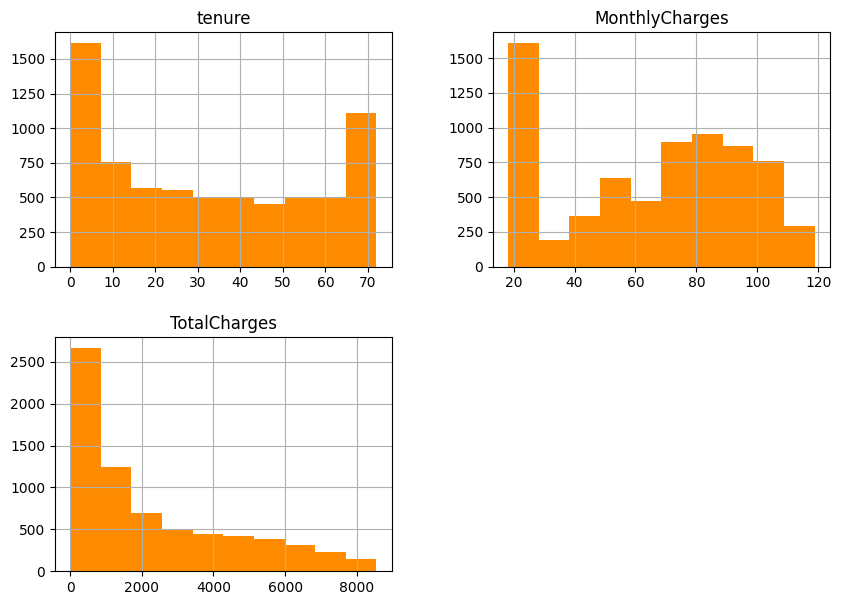

In [1112]:
dataset.hist(figsize=(10, 7), color='darkorange')
plt.show()

### **Multivariate Analysis**

C:\Users\madii\AppData\Local\Temp\ipykernel_17180\3704308003.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=dataset, palette='Set2')
C:\Users\madii\AppData\Local\Temp\ipykernel_17180\3704308003.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=dataset, palette='Set2')


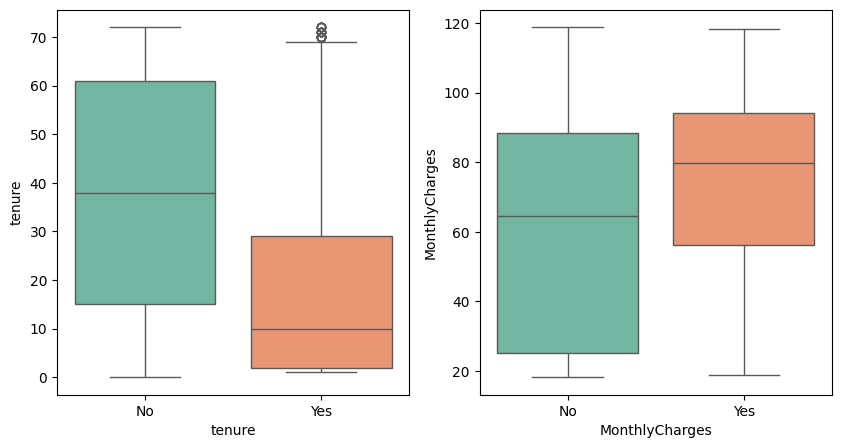

In [1113]:
plt.figure(figsize=(10, 5))
plotnumber=1
for feature in numerical_features:
    if feature == 'TotalCharges':
        pass
    else:
        ax = plt.subplot(1, 2, plotnumber)
        sns.boxplot(x='Churn', y=feature, data=dataset, palette='Set2')
        plt.xlabel(feature)
        plotnumber+=1

plt.show()

**Take a look about correlation in target and other features**

To know the correlation between categorical data, we can use chisquare method.

In [1114]:
from scipy.stats import chi2_contingency
# check correlation between features and target
def chi2_test(feature_name, target):

    contingency_table = pd.crosstab(dataset[feature_name], dataset[target])

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    alpha = 0.05

    significance_level = 'Significant' if p < alpha else 'Not Significant'


    summary = pd.DataFrame({
        'Feature': [feature_name],
        'Chi-Square Statistic': [chi2],
        'P-Value': [p],
        'Alpha Value': [alpha],
        'Significance Level': [significance_level]
    })

    return summary

In [1115]:
significance_summary = pd.DataFrame({
        'Feature': [],
        'Chi-Square Statistic': [],
        'P-Value': [],
        'Alpha Value': [],
        'Significance Level': []
})

for col in dataset.columns:
    if col == 'Churn':
        pass
    elif col == 'tenure':
        pass
    elif col == 'MonthlyCharges':
        pass
    else:
        result = chi2_test(col, 'Churn')
        significance_summary = pd.concat([significance_summary, result])

In [1116]:
significance_summary.reset_index(drop=True)

,Feature,Chi-Square Statistic,P-Value,Alpha Value,Significance Level
0,gender,0.484083,4.865787e-01,0.05,Not Significant
1,SeniorCitizen,159.426300,1.510067e-36,0.05,Significant
2,Partner,158.733382,2.139911e-36,0.05,Significant
3,Dependents,189.129249,4.924922e-43,0.05,Significant
4,PhoneService,0.915033,3.387825e-01,0.05,Not Significant
5,MultipleLines,11.330441,3.464383e-03,0.05,Significant
6,InternetService,732.309590,9.571788e-160,0.05,Significant
7,OnlineSecurity,849.998968,2.661150e-185,0.05,Significant
8,OnlineBackup,601.812790,2.079759e-131,0.05,Significant
9,DeviceProtection,558.419369,5.505219e-122,0.05,Significant


## **Data Preparation**

In [1117]:
main_data = dataset.drop(columns=['gender', 'PhoneService'])

In [1118]:
main_data['total_services'] = 0

services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

def service_score(col):
    for index, row in main_data.iterrows():
        if row[col] == 'Yes':
            main_data.at[index, 'total_services'] += 1

# Loop through each service column and call service_score function
for col in services:
    service_score(col)


**Split the data**

In [1119]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data and make sure Stratified 
X = main_data
y = main_data['Churn']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [1120]:
X_train, X_test = X_train.drop(columns='Churn'),  X_test.drop(columns='Churn')

## **Data Preprocessing**

In [1121]:
num_features = X_train.describe().columns.to_list()
cat_features = X_train.columns[~X_train.columns.isin(X_train.describe().columns)].to_list()


In [1122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# One hot encoding for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Normalization data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num', numerical_transformer, num_features)
    ])

# Fit the preprocessor to your training data
preprocessor.fit(X_train)

# Transform 
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [1123]:
le = LabelEncoder()

le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

## **Model Development**

In [1124]:
# To store model results
model_results = {}

In [1125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier instance
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_encoded, y_train_encoded)

y_test_predicted_rf = rf.predict(X_test_encoded)

model_results['rf'] = (y_test_encoded, y_test_predicted_rf)
print(classification_report(y_test_encoded, y_test_predicted_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [1126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train_encoded, y_train_encoded)

y_test_predicted_knn = knn.predict(X_test_encoded)

model_results['knn'] = (y_test_encoded, y_test_predicted_knn)
print(classification_report(y_test_encoded, y_test_predicted_knn))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1552
           1       0.57      0.55      0.56       561

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113



In [1127]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr.fit(X_train_encoded, y_train_encoded)

y_test_predicted_lr = lr.predict(X_test_encoded)

model_results['lr'] = (y_test_encoded, y_test_predicted_lr)
print(classification_report(y_test_encoded, y_test_predicted_lr))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.57      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [1128]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, random_state=42)

ada.fit(X_train_encoded, y_train_encoded)

y_test_predicted_ada = ada.predict(X_test_encoded)

model_results['ada'] = (y_test_encoded, y_test_predicted_ada)
print(classification_report(y_test_encoded, y_test_predicted_ada))

d:\BANGKIT\DICODING MLOPS\Machine Learning Terapan\Submission\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.65      0.53      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



## **Evaluation**

In [1135]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Initialize lists to store metrics
model_names = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Iterate through each model
for model_name, (y_true, y_pred) in model_results.items():
    # Calculate precision, recall, F1 score, accuracy
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, labels=[1], average=None)
    
    # Append metrics to lists
    model_names.append(model_name)
    precisions.append(round(precision[0], 2))
    recalls.append(round(recall[0], 2))
    f1_scores.append(round(f1_score[0], 2))
    accuracies.append(round(accuracy, 2))

# Create a DataFrame to store the metrics
summary_table = pd.DataFrame({
    'Model': model_names,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'Accuracies': accuracies
})

# Display the summary table
summary_table


,Model,Precision,Recall,F1 Score,Accuracies
0,rf,0.62,0.48,0.54,0.78
1,knn,0.57,0.55,0.56,0.77
2,lr,0.67,0.57,0.61,0.81
3,ada,0.65,0.53,0.58,0.80


Above table is summary about the performance machine learning models when predict customer who would Churn. The best performance models is logistic regression. the precision is close to 70, and the accurcay is above 80. Also F1 Score for logistic regression model is the highest among all models. So, the logistic regression is the best model for predict customers who would Churn.